# Ejercicio 1

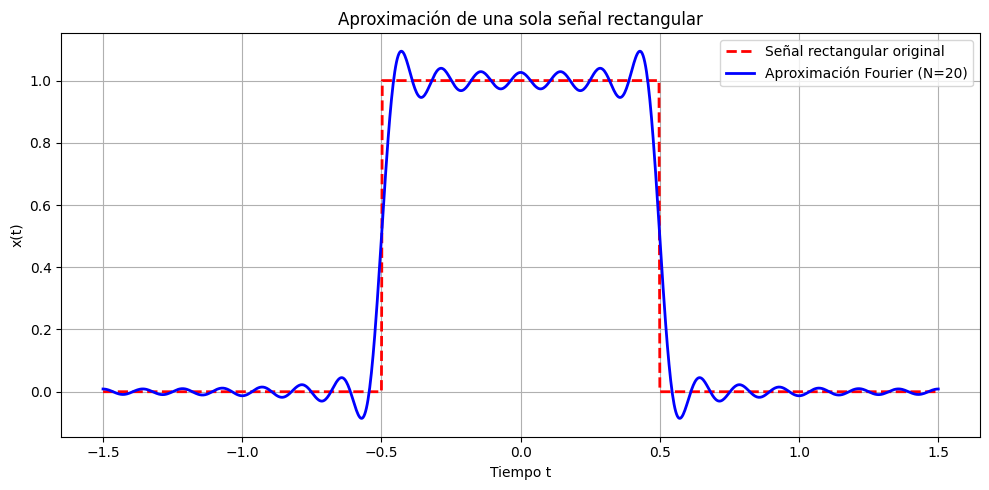

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
A = 1          # Amplitud
tau = 1        # Ancho del pulso
T = 3          # Periodo (> tau)
N = 20         # Número de términos en la serie

# Frecuencia angular fundamental
w0 = 2 * np.pi / T

# Tiempo solo alrededor del pulso rectangular (una réplica)
t = np.linspace(-1.5 * tau, 1.5 * tau, 1000)

# Aproximación por Serie de Fourier (que normalmente es periódica)
def fourier_series_rect(t, A, tau, T, N):
    a0 = A * tau / T
    result = a0 * np.ones_like(t)
    for n in range(1, N+1):
        sinc_term = np.sinc(n * tau / T)  # sinc normalizado
        an = 2 * A * tau / T * sinc_term
        result += an * np.cos(n * w0 * t)
    return result

# Señal rectangular original (una sola réplica)
def original_rect(t, A, tau):
    return A * ((np.abs(t) < tau/2).astype(float))

# Calcular
x_orig = original_rect(t, A, tau)
x_approx = fourier_series_rect(t, A, tau, T, N)

# Graficar
plt.figure(figsize=(10, 5))
plt.plot(t, x_orig, label='Señal rectangular original', color='red', linestyle='--', linewidth=2)
plt.plot(t, x_approx, label=f'Aproximación Fourier (N={N})', color='blue', linewidth=2)
plt.title('Aproximación de una sola señal rectangular')
plt.xlabel('Tiempo t')
plt.ylabel('x(t)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Ejercicio 2


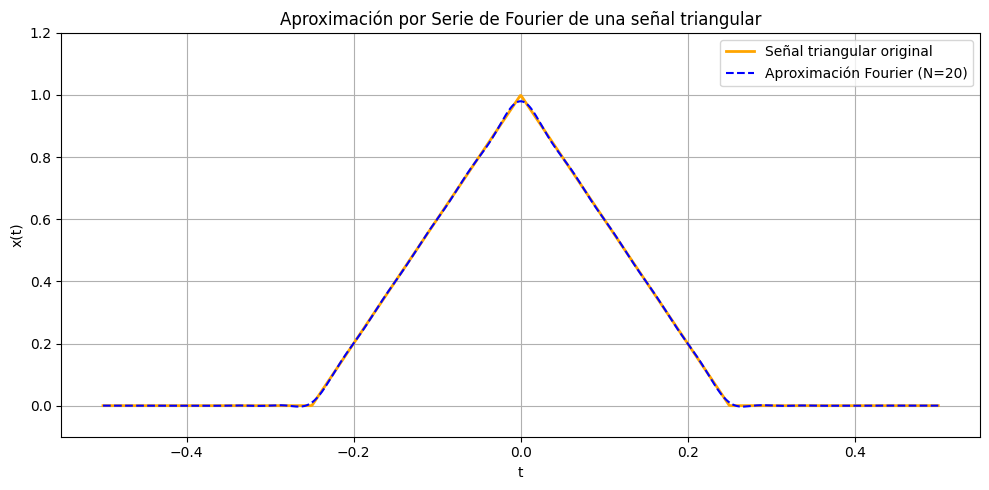

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, integrate, cos, pi, simplify, lambdify

# Parámetros
tau_val = 1   # Periodo de la señal triangular
B_val = 1     # Amplitud máxima
N = 20        # Número de términos en la serie

# Cálculo de a₀ (término constante)
def calcular_a0(B, tau):
    t = symbols('t', real=True)
    x1 = (4*B/tau)*(t + tau/4)
    x2 = (-4*B/tau)*(t - tau/4)
    return (2/tau) * (integrate(x1, (t, -tau/4, 0)) + integrate(x2, (t, 0, tau/4)))

# Cálculo de aₙ (coeficientes de coseno)
def calcular_an_expr(B, tau):
    t, n = symbols('t n', real=True)
    x1 = (4*B/tau)*(t + tau/4)
    x2 = (-4*B/tau)*(t - tau/4)
    an = (2/tau) * (
        integrate(x1 * cos(2 * pi * n * t / tau), (t, -tau/4, 0)) +
        integrate(x2 * cos(2 * pi * n * t / tau), (t, 0, tau/4))
    )
    return simplify(an)

# Obtener coeficientes
a0_val = calcular_a0(B_val, tau_val)
an_expr = calcular_an_expr(B_val, tau_val)
an_func = lambdify(symbols('n'), an_expr, modules=["numpy"])

# Valores de n y coeficientes numéricos
n_vals = np.arange(1, N + 1)
an_vals = np.array([an_func(n) for n in n_vals], dtype=float)

# Tiempo centrado en un periodo
t_vals = np.linspace(-tau_val / 2, tau_val / 2, 1000)

# Matriz de armónicos (cosenos)
harmonics_matrix = np.cos(2 * np.pi * np.outer(n_vals, t_vals) / tau_val)

# Reconstrucción de la señal con la serie de Fourier
x_approx = float(a0_val) / 2 + np.dot(an_vals, harmonics_matrix)

# Señal triangular original (no periódica, definida solo en [-τ/4, τ/4])
def x_t_vectorizada(t):
    return np.where(
        (-tau_val/4 <= t) & (t < 0),                    # Tramo izquierdo
        (4*B_val/tau_val)*(t + tau_val/4),              # Pendiente positiva
        np.where(
            (0 <= t) & (t <= tau_val/4),                # Tramo derecho
            (-4*B_val/tau_val)*(t - tau_val/4),         # Pendiente negativa
            0                                           # Fuera del soporte
        )
    )

x_original = x_t_vectorizada(t_vals)

# Gráfica
plt.figure(figsize=(10, 5))
plt.plot(t_vals, x_original, label='Señal triangular original', linewidth=2, color='orange')
plt.plot(t_vals, x_approx, '--', label=f'Aproximación Fourier (N={N})', color='blue')
plt.title('Aproximación por Serie de Fourier de una señal triangular')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.ylim(-0.1, B_val + 0.2)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
